In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-29 19:03:31.310805: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-29 19:03:31.389954: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-29 19:03:32.611052: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Haemulidae/RJ_Reconstrucao_Haemulidae_2024_08_09.xlsx')
df_Cocoroca_ind = pd.DataFrame(df[['Ano','Cocoroca_ind']])

dados = df_Cocoroca_ind.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Cocoroca_ind'].values
dados.head()

,Ano,Cocoroca_ind
46,1996,4.5
47,1997,15.0
48,1998,21.5
49,1999,2.5
50,2000,13.5


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [4]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=500, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Haemulidae/Cocoroca/pesos pesca ind/.weights.h5', overwrite=True)

/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0015
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.9948
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.9895
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.9835
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.9774
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.9717
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.9668
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.9630
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.9598
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.9558
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.9506
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.9442
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.9370
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.9299
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.9224
Epoch 16/500
1/1 ━━━━

In [5]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Haemulidae/Cocoroca/pesos pesca ind/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Previsões dos dados ausentes: [[5.4510307]]


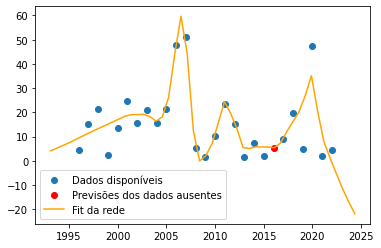

In [6]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

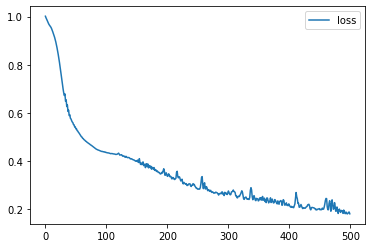

In [7]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [8]:
#Planilha com os dados preenchidos

df_previsoes = pd.DataFrame({'Ano':anos_para_prever, 'Cocoroca_ind':prev_ausentes.flatten()})

df_preenchido = pd.concat((dados,df_previsoes)).sort_values('Ano')

df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Haemulidae/Cocoroca/Interpolações Cocoroca_ind.xlsx')

df_preenchido

,Ano,Cocoroca_ind
46,1996,4.500000
47,1997,15.000000
48,1998,21.500000
49,1999,2.500000
50,2000,13.500000
51,2001,24.500000
52,2002,15.500000
53,2003,21.000000
54,2004,15.500000
55,2005,21.500000
